In [1]:
import os
import re
import sys
import time
import tweepy
import json
import datetime 
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import dateutil.parser
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
from tweepy import OAuthHandler
from wordcloud import WordCloud
from matplotlib.lines import Line2D
from IPython.display import clear_output
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
log = pd.read_csv('Login.csv')
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accesToken = log['key'][2]
accesTokenSecret = log['key'][3]
bearer_token = log['key'][4]
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accesToken, accesTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)
client = tweepy.Client(bearer_token = bearer_token, wait_on_rate_limit=True)

In [3]:
#Mexico woeid = 23424900
#CDMX woeid = 116545
#US woeid = 23424977
#NewYork woeid = 2459115
#London woeid = 44418
#World woeid = 1

woeid = 1
trend_name_lst = []
trend_count_lst = []

trends = api.get_place_trends(id = woeid)
for value in trends:
    for trend in value['trends']:
        trend_name_lst.append(trend['name'])
        trend_count_lst.append(trend['tweet_volume'])

df_trend = pd.DataFrame(trend_name_lst, columns=['trend'])
df_trend['count'] = trend_count_lst
df_trend['date'] = datetime.date.today()
df_trend.to_csv('trend.csv')
df_trend_asc = df_trend.sort_values("count", ascending=False)
df_trend_asc

,trend,count,date
32,Nota,103663.0,2022-07-04
24,Shout Out,100554.0,2022-07-04
17,Walk The Line,57153.0,2022-07-04
5,Happy 4th of July,54271.0,2022-07-04
1,#MondayMotivation,53756.0,2022-07-04
6,OUR JAEYUNIUS LYRICIST,46110.0,2022-07-04
22,स्वामी विवेकानंद,43262.0,2022-07-04
34,CBI Make SSRJustice Priority,41961.0,2022-07-04
44,テニプリ国勢調査,24054.0,2022-07-04
29,Breaking Bad,17545.0,2022-07-04


c:\Users\DavidMM\Documents\VS Code\TwitterEnv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DavidMM\Documents\VS Code\TwitterEnv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DavidMM\Documents\VS Code\TwitterEnv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DavidMM\Documents\VS Code\TwitterEnv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DavidMM\Documents\VS Code\TwitterEnv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL

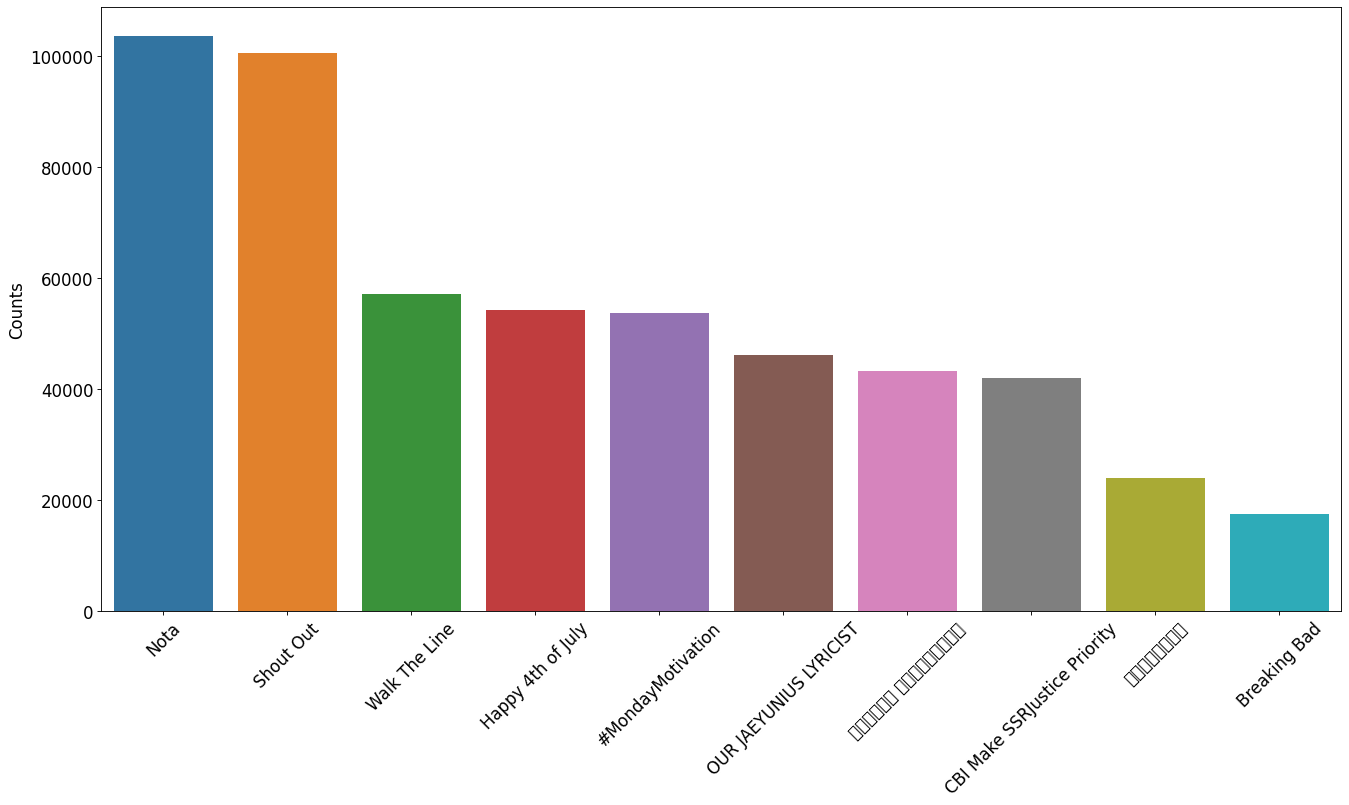

In [5]:
mpl.rcParams['figure.facecolor'] = 'white'
f, ax = plt.subplots(figsize = (20, 10), dpi= 80)
sns.barplot(x = 'trend', y = 'count', data = df_trend_asc[0:10])
plt.xticks(rotation = 45)
plt.ylabel('Counts', fontsize = 15)
plt.xlabel('', fontsize = 10)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

In [9]:
date_lst = []
count_lst = []
start_lst = ['2022-01-01T00:00:00Z', '2022-02-01T00:00:00Z', '2022-03-01T00:00:00Z', '2022-04-01T00:00:00Z', '2022-05-01T00:00:00Z', '2022-06-01T00:00:00Z']
end_lst = ['2022-02-01T00:00:00Z', '2022-03-01T00:00:00Z', '2022-04-01T00:00:00Z', '2022-05-01T00:00:00Z', '2022-06-01T00:00:00Z', '2022-06-21T00:00:00Z']
query = 'Amber Heard -is:retweet' #place_country:US, OR, has:media, lang:en

for i in range(0,len(start_lst)):

  counts = client.get_all_tweets_count(query = query, start_time = start_lst[i], end_time = end_lst[i], granularity='day')

  for count in counts.data:

    count_lst.append(count['tweet_count'])
    d = dateutil.parser.parse(str(count['start']))
    date_lst.append(d.strftime('%m/%d/%Y'))

df_count = pd.DataFrame(date_lst, columns=['Day'])
df_count['Count'] = count_lst
df_count

,Day,Count
0,01/01/2022,248
1,01/02/2022,242
2,01/03/2022,281
3,01/04/2022,364
4,01/05/2022,399
...,...,...
166,06/16/2022,13928
167,06/17/2022,12259
168,06/18/2022,10748
169,06/19/2022,8611


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


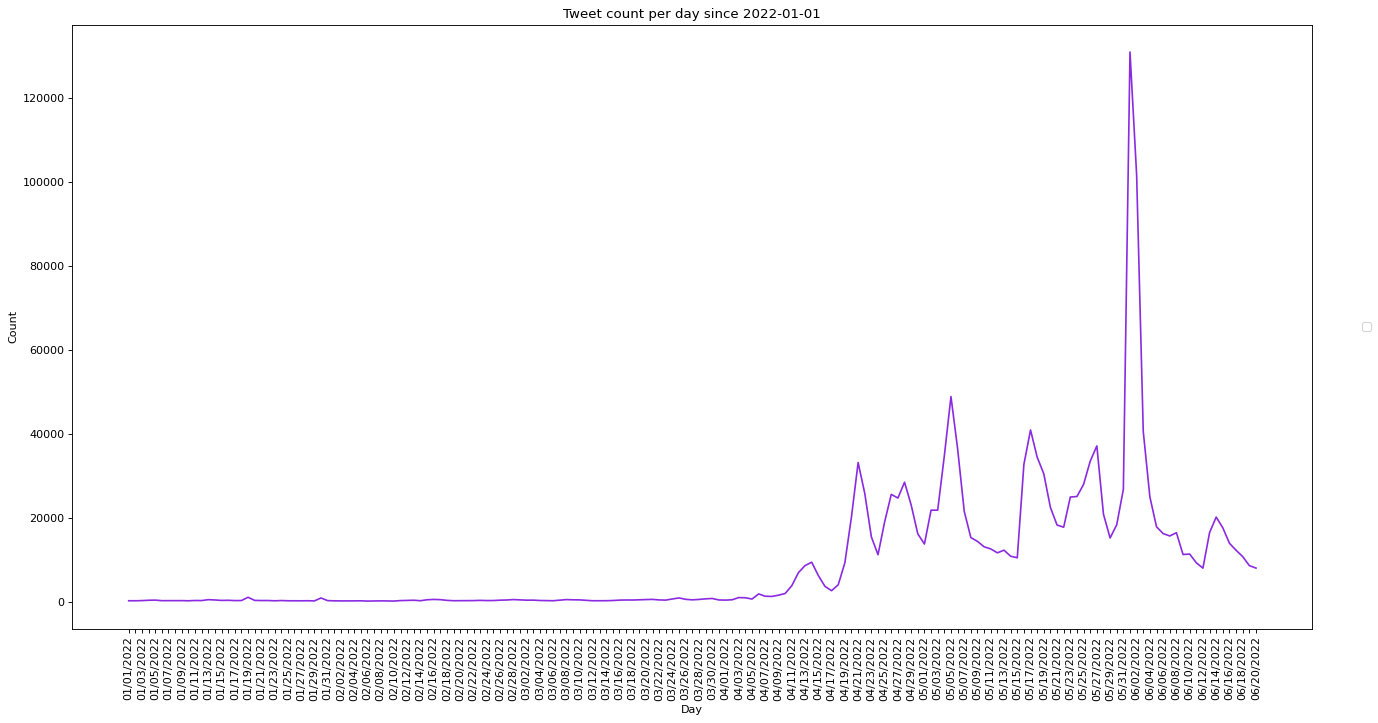

In [10]:
f, ax = plt.subplots(figsize = (20, 10), dpi= 80)
sns.lineplot(x = "Day", y = "Count", data = df_count, color = 'blueviolet').set_title("Tweet count per day since 2022-01-01")
plt.tick_params(axis = 'x', labelrotation = 90)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
for label in ax.get_xticklabels()[1::2]:
    label.set_visible(False)
plt.show()

In [12]:
start_date_lst = pd.date_range(start="2022-01-01",end="2022-06-20").to_pydatetime().tolist()
end_date_lst = pd.date_range(start="2022-01-02",end="2022-06-21").to_pydatetime().tolist()
start_date_conv = []
end_date_conv = []

for date in start_date_lst:
  dateconv=pd.to_datetime(date).strftime('%Y-%m-%dT%H:%M:%SZ')
  start_date_conv.append(dateconv)

for date in end_date_lst:
  dateconv=pd.to_datetime(date).strftime('%Y-%m-%dT%H:%M:%SZ')
  end_date_conv.append(dateconv)

tweet_lst = []
tweet_date =[]
tweet_query = 'Amber Heard -is:retweet lang:en'

for i in range(0,len(start_date_conv)):

  response = client.search_all_tweets(query = tweet_query, tweet_fields=['created_at'], start_time = start_date_conv[i], end_time = end_date_conv[i], max_results = 500)
  time.sleep(1.0)

  for tweet in response.data:

    tweet_lst.append([tweet.text])
    tweet_date.append(tweet.created_at.strftime('%m/%d/%Y'))
    
df_tweet = pd.DataFrame(tweet_lst, columns=['tweet'])
df_tweet['date']=tweet_date
df_tweet

Rate limit exceeded. Sleeping for 393 seconds.


,tweet,date
0,@sansevieriafilm Naa Amber Heard should be hel...,01/01/2022
1,I saw Amber HeArd in a gay pub a few weeks ago...,01/01/2022
2,#BoycottWB \nJohnny Depp \n#AmberHeardIsTheRea...,01/01/2022
3,@RealTimewithWes @dabatman_ @AJCI282002 I’m wo...,01/01/2022
4,random shower thought:\nwhy was Amber heard ca...,01/01/2022
...,...,...
66724,Johnny Depp wants to move on but Amber Heard s...,06/20/2022
66725,**This tweet was PAID for by Amber Heard's PR ...,06/20/2022
66726,"Johnny Depp Posts Message About ""Moving Forwar...",06/20/2022
66727,"@AliyaSaad4 Apparently, she signed a multi-mil...",06/20/2022


In [13]:
hashtag_lst = []

for tweet in df_tweet['tweet']:
  hashtag = re.findall(r"#(\w+)", tweet)
  hashtag_lst.append(hashtag)

hashtag_lst_clean =  list(filter(lambda x: x, hashtag_lst))

hashtag_list2 = []

for l in hashtag_lst_clean :
    for str in l:
      hashtag_list2.append(str)

hashtag_dict = Counter(hashtag_list2)
df_hashtags = pd.DataFrame(list(hashtag_dict.items()), columns = ['Hashtag','Counts'])
df_hashtags_asc = df_hashtags.sort_values("Counts", ascending=False)
df_hashtags_asc

,Hashtag,Counts
7,JusticeForJohnnyDepp,3225
12,AmberHeard,1663
13,JohnnyDepp,1659
14,AmberHeardIsALiar,1336
15,AmberHeardIsAnAbuser,1275
...,...,...
2101,criminals,1
2102,DavidDuchovny,1
2103,birthday,1
2104,JohnnyDeppIsAVictim,1


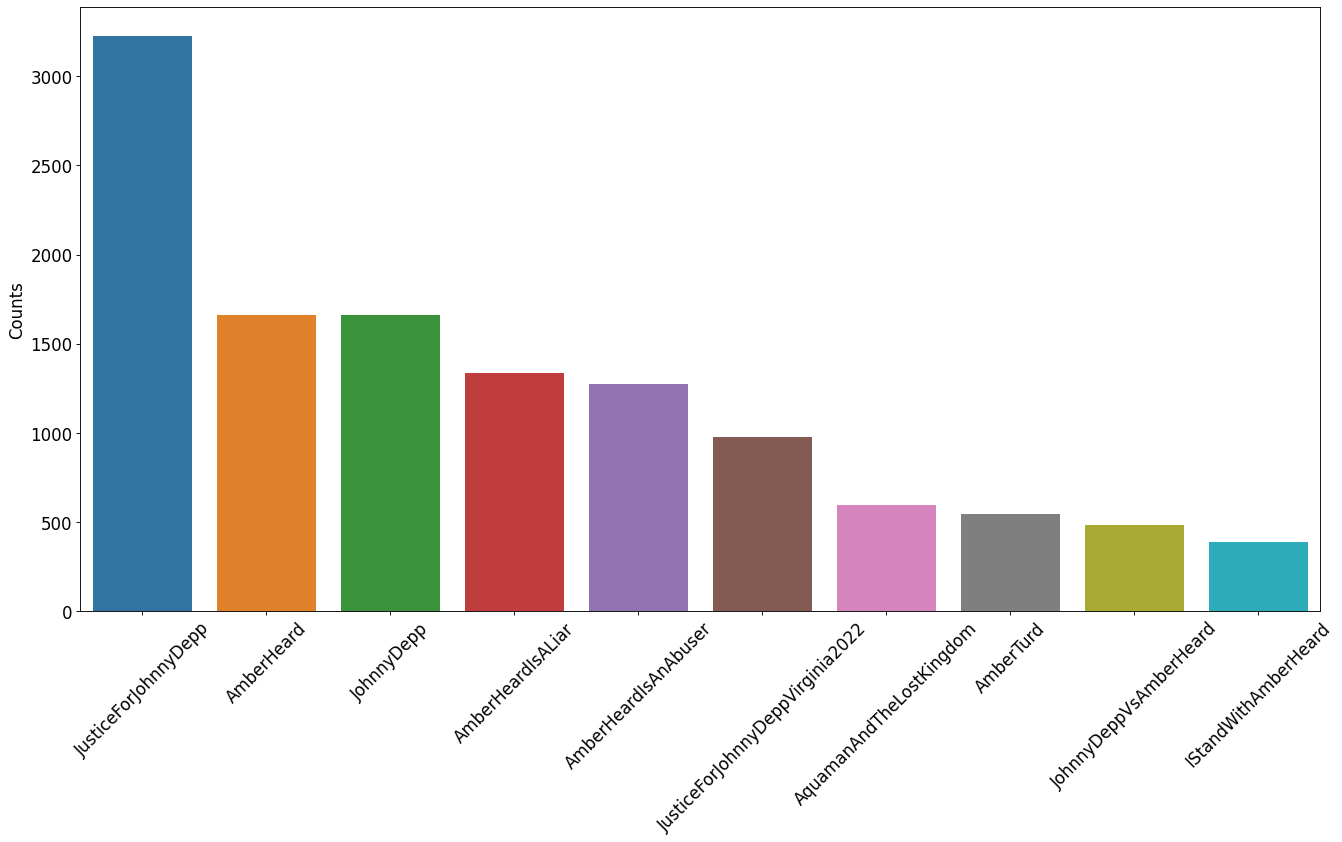

In [14]:
f, ax = plt.subplots(figsize = (20, 10), dpi= 80)
sns.barplot(x = 'Hashtag', y = 'Counts', data = df_hashtags_asc[0:10])
plt.xticks(rotation = 45)
plt.ylabel('Counts', fontsize = 15)
plt.xlabel('', fontsize = 10)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

In [15]:
def cleanTwt(twt):
  twt = re.sub(r'@[A-Za-z0-9]+', ' ', twt)
  twt = re.sub(r'[^A-Za-z ]', ' ', twt)  
  twt = re.sub(r'#', ' ', twt) 
  twt = re.sub(r'RT[\s]+', ' ', twt) 
  twt = re.sub(r'https?:\/\/\S+', ' ', twt) 
  twt = re.sub(r'https', ' ', twt)
  twt = re.sub(r'http', ' ', twt)
  twt = re.sub(r'http?:\/\/\S+', ' ', twt) 
  twt = re.sub(r'_', ' ', twt) 
  twt = re.sub(r'-', ' ', twt) 
  twt = re.sub(r'\n', ' ', twt) 
  twt = re.sub(r'&amp', ' ', twt) 

  return twt


df_tweet['cleaned_tweet'] = df_tweet['tweet'].apply(cleanTwt)
df_tweet

,tweet,date,cleaned_tweet
0,@sansevieriafilm Naa Amber Heard should be hel...,01/01/2022,Naa Amber Heard should be held accountable ...
1,I saw Amber HeArd in a gay pub a few weeks ago...,01/01/2022,I saw Amber HeArd in a gay pub a few weeks ago...
2,#BoycottWB \nJohnny Depp \n#AmberHeardIsTheRea...,01/01/2022,BoycottWB Johnny Depp AmberHeardIsTheRealA...
3,@RealTimewithWes @dabatman_ @AJCI282002 I’m wo...,01/01/2022,I m worried about the Aquaman movie ...
4,random shower thought:\nwhy was Amber heard ca...,01/01/2022,random shower thought why was Amber heard cas...
...,...,...,...
66724,Johnny Depp wants to move on but Amber Heard s...,06/20/2022,Johnny Depp wants to move on but Amber Heard s...
66725,**This tweet was PAID for by Amber Heard's PR ...,06/20/2022,This tweet was PAID for by Amber Heard s PR ...
66726,"Johnny Depp Posts Message About ""Moving Forwar...",06/20/2022,Johnny Depp Posts Message About Moving Forwar...
66727,"@AliyaSaad4 Apparently, she signed a multi-mil...",06/20/2022,Apparently she signed a multi million dolla...


In [16]:
def getPolarity(text):
  
  sid = SentimentIntensityAnalyzer()

  return sid.polarity_scores(text)


df_tweet['tweet_sentiment'] = df_tweet['cleaned_tweet'].apply(getPolarity)
df_tweet.head()

,tweet,date,cleaned_tweet,tweet_sentiment
0,@sansevieriafilm Naa Amber Heard should be hel...,01/01/2022,Naa Amber Heard should be held accountable ...,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp..."
1,I saw Amber HeArd in a gay pub a few weeks ago...,01/01/2022,I saw Amber HeArd in a gay pub a few weeks ago...,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp..."
2,#BoycottWB \nJohnny Depp \n#AmberHeardIsTheRea...,01/01/2022,BoycottWB Johnny Depp AmberHeardIsTheRealA...,"{'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compou..."
3,@RealTimewithWes @dabatman_ @AJCI282002 I’m wo...,01/01/2022,I m worried about the Aquaman movie ...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp..."
4,random shower thought:\nwhy was Amber heard ca...,01/01/2022,random shower thought why was Amber heard cas...,"{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp..."


In [17]:
df_tweet['compound'] = df_tweet['tweet_sentiment'].apply(lambda score_dict: score_dict['compound'])
df_tweet['sentiment_type']=''
df_tweet.loc[df_tweet.compound>0,'sentiment_type']='POSITIVE'
df_tweet.loc[df_tweet.compound==0,'sentiment_type']='NEUTRAL'
df_tweet.loc[df_tweet.compound<0,'sentiment_type']='NEGATIVE'
df_tweet

,tweet,date,cleaned_tweet,tweet_sentiment,compound,sentiment_type
0,@sansevieriafilm Naa Amber Heard should be hel...,01/01/2022,Naa Amber Heard should be held accountable ...,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...",0.4404,POSITIVE
1,I saw Amber HeArd in a gay pub a few weeks ago...,01/01/2022,I saw Amber HeArd in a gay pub a few weeks ago...,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",0.3612,POSITIVE
2,#BoycottWB \nJohnny Depp \n#AmberHeardIsTheRea...,01/01/2022,BoycottWB Johnny Depp AmberHeardIsTheRealA...,"{'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compou...",-0.3182,NEGATIVE
3,@RealTimewithWes @dabatman_ @AJCI282002 I’m wo...,01/01/2022,I m worried about the Aquaman movie ...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",-0.2960,NEGATIVE
4,random shower thought:\nwhy was Amber heard ca...,01/01/2022,random shower thought why was Amber heard cas...,"{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp...",0.6705,POSITIVE
...,...,...,...,...,...,...
66724,Johnny Depp wants to move on but Amber Heard s...,06/20/2022,Johnny Depp wants to move on but Amber Heard s...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.7783,POSITIVE
66725,**This tweet was PAID for by Amber Heard's PR ...,06/20/2022,This tweet was PAID for by Amber Heard s PR ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
66726,"Johnny Depp Posts Message About ""Moving Forwar...",06/20/2022,Johnny Depp Posts Message About Moving Forwar...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
66727,"@AliyaSaad4 Apparently, she signed a multi-mil...",06/20/2022,Apparently she signed a multi million dolla...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


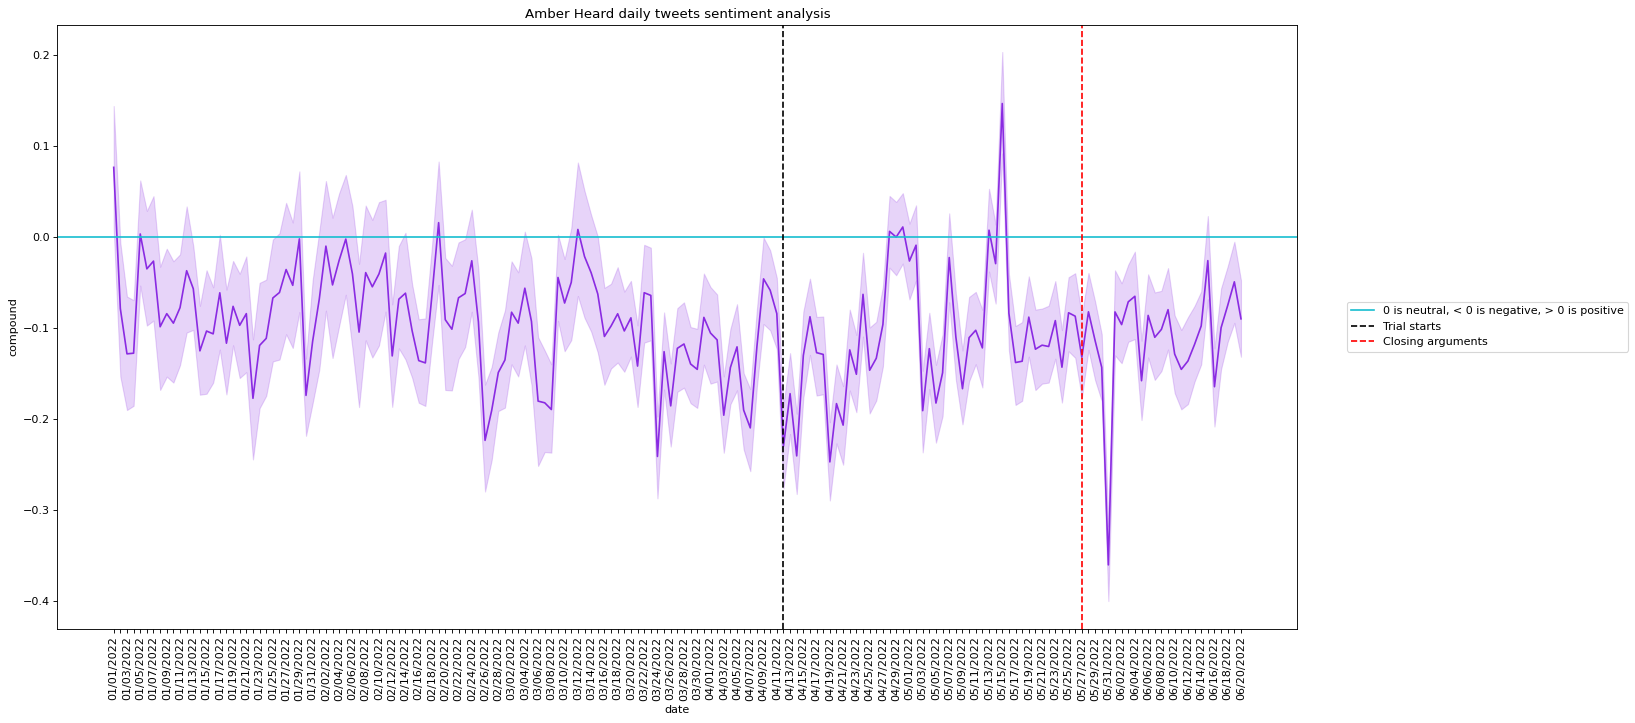

In [18]:
f, ax = plt.subplots(figsize = (20, 10), dpi= 80)
sns.lineplot(x = "date", y = ("compound"), data = df_tweet, color = 'blueviolet', estimator='mean', err_style="band", ci=95).set_title("Amber Heard daily tweets sentiment analysis")
ax.axhline(0, color = 'tab:cyan', label='0 is neutral, < 0 is negative, > 0 is positive')
ax.axvline('04/12/2022', color = 'black', ls='--', label='Trial starts')
ax.axvline('05/27/2022', color = 'red', ls='--', label = 'Closing arguments')
plt.tick_params(axis = 'x', labelrotation = 90)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
for label in ax.get_xticklabels()[1::2]:
    label.set_visible(False)
plt.show()

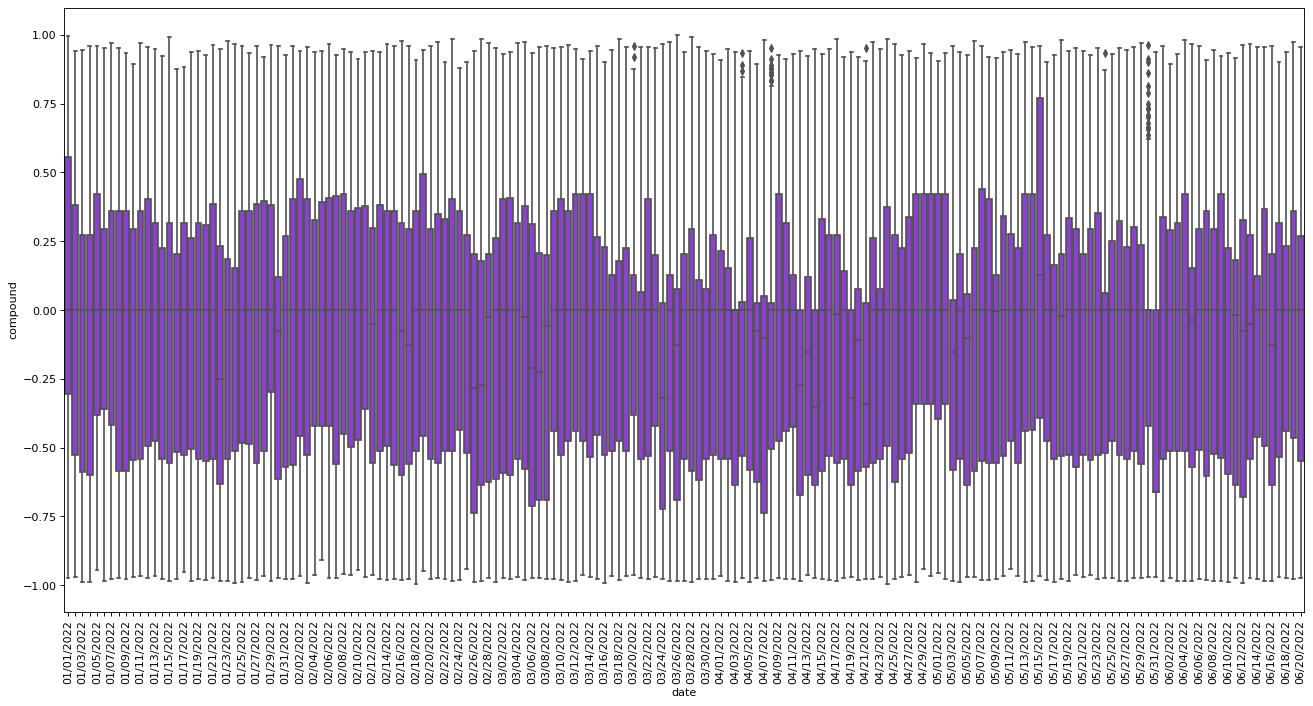

In [19]:
f, ax = plt.subplots(figsize = (20, 10), dpi= 80)
sns.boxplot(x = "date", y = ("compound"), data = df_tweet, color = 'blueviolet').set_title("")
plt.tick_params(axis = 'x', labelrotation = 90)
for label in ax.get_xticklabels()[1::2]:
    label.set_visible(False)
plt.show()

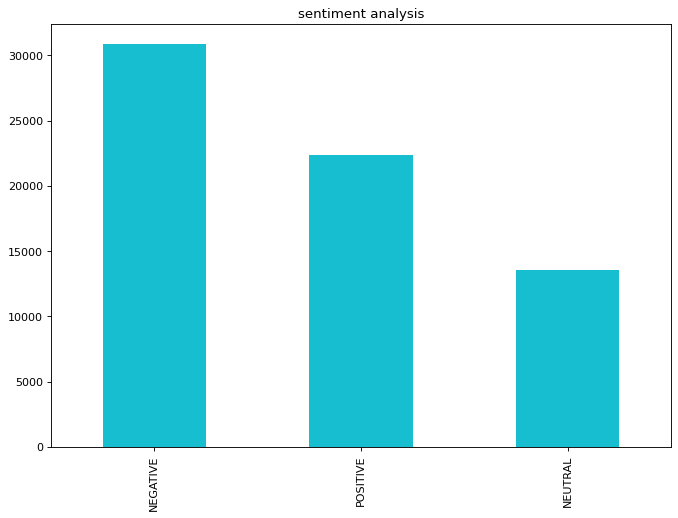

In [20]:
plt.figure(figsize=(10, 7), dpi= 80)
df_tweet.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = 'tab:cyan')
plt.show()

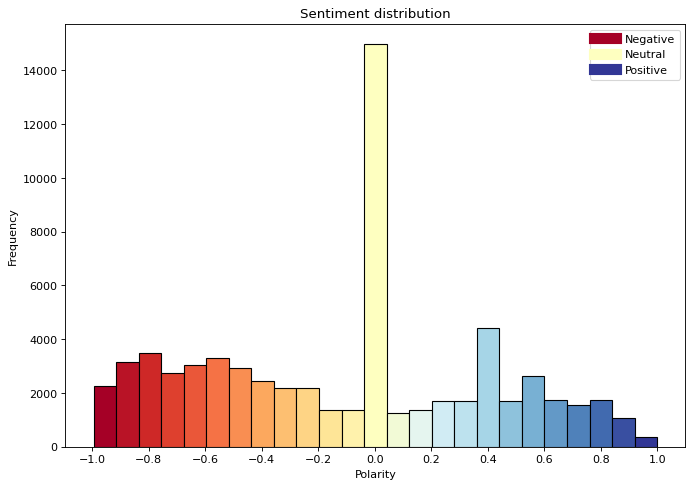

In [21]:
plt.figure(figsize=(10, 7), dpi= 80)
cm = plt.cm.get_cmap('RdYlBu')
n, bins, patches = plt.hist(df_tweet['compound'], 25, edgecolor='black', linewidth=1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Sentiment distribution')
plt.xlabel('Polarity')
plt.xticks(np.arange(-1.0, 1.1, step=0.2))
plt.ylabel('Frequency')

custom_lines = [Line2D([0], [0], color=cm(0.), lw=10),
                Line2D([0], [0], color=cm(.5), lw=10),
                Line2D([0], [0], color=cm(1.), lw=10)]

plt.legend(custom_lines, ['Negative', 'Neutral', 'Positive'])
plt.show()

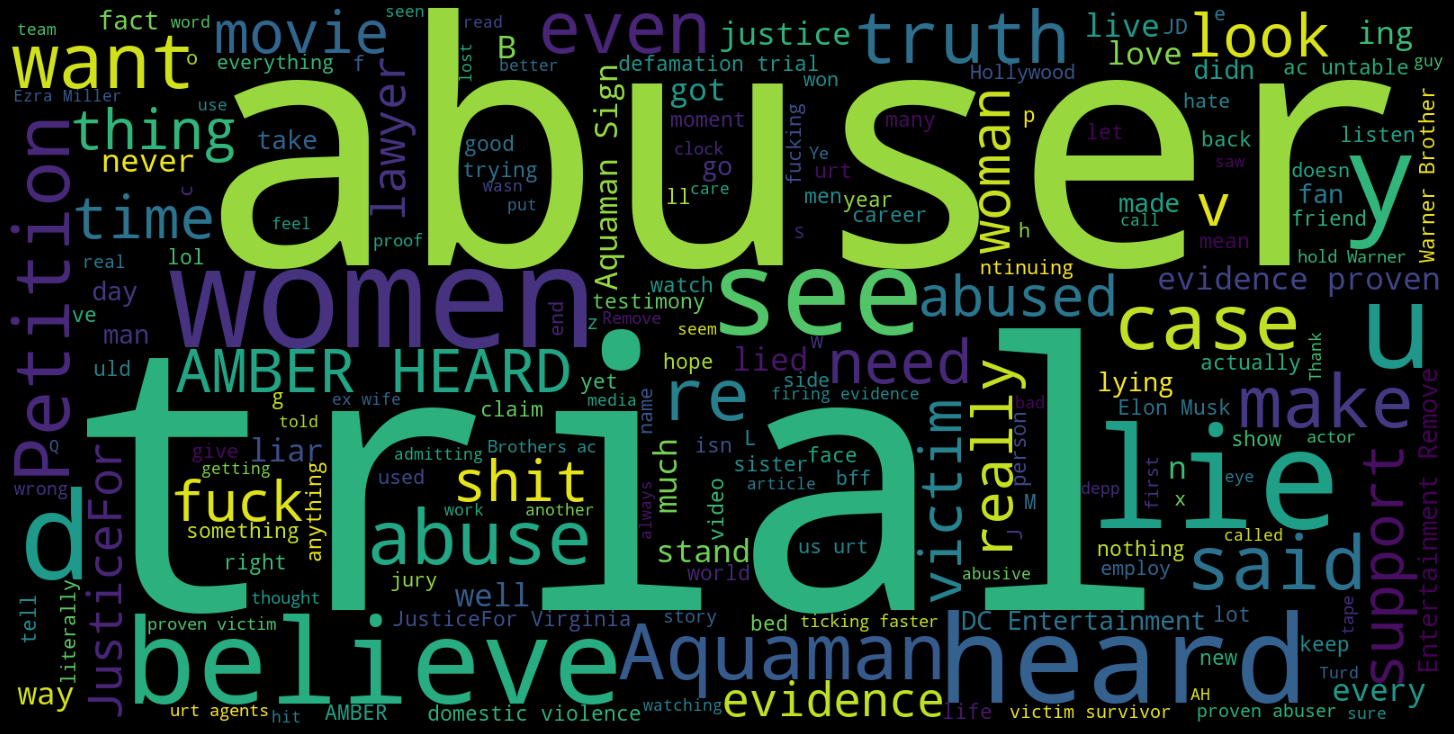

In [22]:
def cleanTwt2(twt):
  twt = re.sub(r'Johnny Depp', ' ', twt)
  twt = re.sub(r'JohnnyDepp', ' ', twt)
  twt = re.sub(r'johnny depp', ' ', twt)
  twt = re.sub(r'Johnny', ' ', twt)   
  twt = re.sub(r'johnny', ' ', twt) 
  twt = re.sub(r'Depp', ' ', twt) 
  twt = re.sub(r'Amber Heard', ' ', twt)
  twt = re.sub(r'amber heard', ' ', twt)
  twt = re.sub(r'Amber heard', ' ', twt)
  twt = re.sub(r'Amber Heard ', ' ', twt)
  twt = re.sub(r'Amber', ' ', twt)
  twt = re.sub(r'Heard', ' ', twt)
  twt = re.sub(r'will', ' ', twt)
  twt = re.sub(r'still', ' ', twt)
  twt = re.sub(r'know', ' ', twt)
  twt = re.sub(r'via', ' ', twt)
  twt = re.sub(r'one', ' ', twt)
  twt = re.sub(r'think', ' ', twt)
  twt = re.sub(r'going', ' ', twt)
  twt = re.sub(r'co', ' ', twt)
  twt = re.sub(r'say', ' ', twt)
  twt = re.sub(r'now', ' ', twt)
  twt = re.sub(r'people', ' ', twt)
  twt = re.sub(r'amp', ' ', twt)
  twt = re.sub(r' m ', ' ', twt)
  twt = re.sub(r' s ', ' ', twt)
  twt = re.sub(r' t ', ' ', twt)
  twt = re.sub(r' don ', ' ', twt)

  return twt


df_tweet['word_cloud'] = df_tweet['cleaned_tweet'].apply(cleanTwt2)

allWords = ' '.join([twts for twts in df_tweet['word_cloud']])
wordCloud = WordCloud(width=1600, height=800).generate(allWords)
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordCloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()